# Histograms and Density plots

This notebook will take a comprehensive look at using histograms and density plots in Python using the matplotlib and seaborn libraries. 

We will visualize the NYCflights13 data, which contains over 300,000 observations of flights departing NYC in 2013. We will focus on displaying a single variable, the arrival delay of flights in minutes. The full code for this article is available as a [Jupyter Notebook on GitHub](https://github.com/WillKoehrsen/Data-Analysis/blob/master/univariate_dist/Histogram%20and%20Density%20Plot.ipynb).

Source: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

We will start exploring our dataset. First, we must mount our google drive:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Colab Notebooks/"

Mounted at /content/drive
'Copia de Te damos la bienvenida a Colaboratory'
 data
 docencia
 mygraph1.png
 proyectos
'Saca el máximo partido de tu suscripción a Colab'


Let us see the fields in the dataset. The field 'name' contains names of the airline, while 'arr_delay' refers the flight arrival delays in minutes. Negative values mean the flight was early.

In [ ]:
import pandas as pd

# please, specify where your dataset is
path = "/content/drive/My Drive/Colab Notebooks/data/delay_flights/"

flights = pd.read_csv(path+'formatted_flights.csv')
flights.head(10)

,Unnamed: 0,arr_delay,name
0,0,11.0,United Air Lines Inc.
1,1,20.0,United Air Lines Inc.
2,2,33.0,American Airlines Inc.
3,3,-18.0,JetBlue Airways
4,4,-25.0,Delta Air Lines Inc.
5,5,12.0,United Air Lines Inc.
6,6,19.0,JetBlue Airways
7,7,-14.0,ExpressJet Airlines Inc.
8,8,-8.0,JetBlue Airways
9,9,8.0,American Airlines Inc.


In [ ]:
print('minimum delay:', flights[['arr_delay']].min())
print('maximum delay:', flights[['arr_delay']].max())



minimum delay: arr_delay   -60.0
dtype: float64
maximum delay: arr_delay    120.0
dtype: float64


## Histogram

A histogram divides the variable into bins, counts the data points in each bin, and shows the bins on the x-axis and the counts on the y-axis. In our case, the bins will be an interval of time representing the delay of the flights and the count will be the number of flights falling into that interval. The binwidth is the most important parameter for a histogram and we should always try out a few different values of binwidth to select the best one for our data.

To create a histogram, we must specify the binwidth by the number of bins. For this plot, I will use bins that are 5 minutes in length, which means that the number of bins will be the range of the data (from -60 to 120 minutes) divided by the binwidth, 5 minutes ( bins = int(180/5)).

First, we will create the plot using the library matplot

Text(0, 0.5, 'Flights')

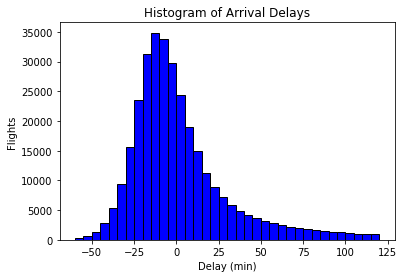

In [ ]:
# Import the libraries
import matplotlib.pyplot as plt
# matplotlib histogram
plt.hist(flights['arr_delay'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

Now, we will use seaborn

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


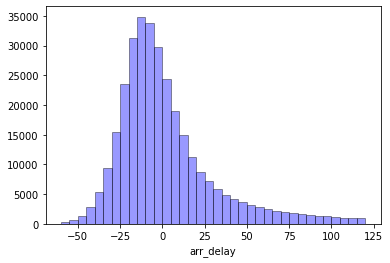

In [ ]:
import seaborn as sns
# seaborn histogram
sns.distplot(flights['arr_delay'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

We can see that both plots show the same distribution. 


**The only way to figure out an optimal binwidth is to try out multiple values!**. In the following cell, we build the same histogram but using differents binwidths [1, 5, 10, 15].

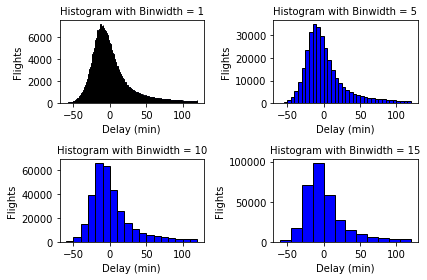

In [ ]:
# Show 4 different binwidths
for i, binwidth in enumerate([1, 5, 10, 15]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(flights['arr_delay'], bins = int(180/binwidth),
             color = 'blue', edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 10)
    ax.set_xlabel('Delay (min)', size = 10)
    ax.set_ylabel('Flights', size= 10)

plt.tight_layout()
plt.show()

Looking this graphs, I think that a binwidth of 5 is the best representation.

The choice of binwidth significantly affects the resulting plot. **Smaller binwidths can make the plot cluttered, but larger binwidths may obscure nuances in the data**. 

Matplotlib will automatically choose a reasonable binwidth for you, but I like to specify the binwidth myself after trying out several values. There is no true right or wrong answer, so try a few options and see which works best for your particular data.


## When Histograms Fail

Histograms are a great way to start exploring a single variable drawn from one category. 

However, when we want to compare the distributions of one variable across multiple categories, histograms have issues with readability. 

For example, if we want to compare arrival delay distributions between airlines, an approach that doesn’t work well is to to create histograms for each airline on the same plot:

<img src="https://miro.medium.com/max/1284/1*ftL3FJYD0Zr3l64xicvLJQ.png">


This plot is not very helpful! All the overlapping bars make it nearly impossible to make comparisons between the airlines.


### Solution 1: Side-by-Side Histograms

Instead of overlapping the airline histograms, we can place them side-by-side. To do this, we create a list of the arrival delays for each airline, and then pass this into the plt.hist function call as a list of lists. We have to specify different colors to use for each airline and a label so we can tell them apart. The code, including creating the lists for each airline is below:

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Airlines')

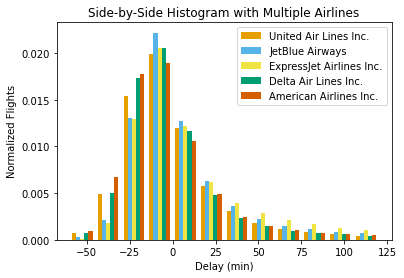

In [ ]:
# Make a separate list for each airline
x1 = list(flights[flights['name'] == 'United Air Lines Inc.']['arr_delay'])
x2 = list(flights[flights['name'] == 'JetBlue Airways']['arr_delay'])
x3 = list(flights[flights['name'] == 'ExpressJet Airlines Inc.']['arr_delay'])
x4 = list(flights[flights['name'] == 'Delta Air Lines Inc.']['arr_delay'])
x5 = list(flights[flights['name'] == 'American Airlines Inc.']['arr_delay'])

# Assign colors for each airline and the names
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
names = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), density=True, color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Delay (min)')
plt.ylabel('Normalized Flights')
plt.title('Side-by-Side Histogram with Multiple Airlines')

By default, if we pass in a list of lists, matplotlib will put the bars side-by-side. 

Here, I have changed the binwidth to 15 minutes because otherwise the plot is too cluttered, but even with this modification, this is not an effective figure.

There is too much information to process at once, the bars don’t align with the labels, and it’s still hard to compare distributions between airlines. When we make a plot, we want it to be as easy for the viewer to understand as possible, and this figure fails by that criteria! Let’s look at a second potential solution.



### Solution 2: Stacked Bars
Instead of plotting the bars for each airline side-by-side, we can stack them by passing in the parameter stacked = True to the histogram call:


(array([[0.00017083, 0.00116771, 0.00370547, 0.00476932, 0.00287629,
         0.00138281, 0.00072901, 0.00044126, 0.00027838, 0.00020857,
         0.00015579, 0.00010755],
        [0.00023071, 0.0016487 , 0.00660049, 0.00970267, 0.00570491,
         0.0027801 , 0.00152895, 0.0009407 , 0.00061805, 0.00046169,
         0.0003462 , 0.00026164],
        [0.00024915, 0.00202385, 0.00927559, 0.01396092, 0.00822649,
         0.00405252, 0.00234649, 0.00154172, 0.00106158, 0.00080392,
         0.00061266, 0.00047276],
        [0.00038905, 0.00302385, 0.01269644, 0.01803103, 0.01054121,
         0.00500826, 0.00281074, 0.00184167, 0.00125143, 0.00094183,
         0.0007256 , 0.00055278],
        [0.00051816, 0.00391319, 0.01505031, 0.02054609, 0.01195296,
         0.0056544 , 0.00312885, 0.00203719, 0.00139359, 0.00104314,
         0.00080591, 0.00062288]]),
 array([-60., -45., -30., -15.,   0.,  15.,  30.,  45.,  60.,  75.,  90.,
        105., 120.]),
 <a list of 5 Lists of Patches objects>)

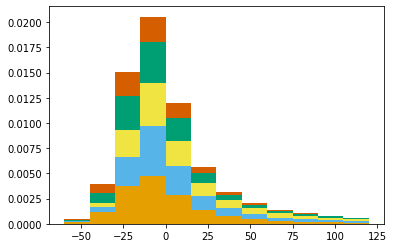

In [ ]:
# Stacked histogram with multiple airlines
plt.hist([x1, x2, x3, x4, x5], bins = int(180/15), stacked=True, density=True, color = colors, label=names)

Well, that definitely is not any better! 

Here, each airline is represented as a section of the whole for each bin, but it’s nearly impossible to make comparisons. 

For example, at a delay of -15 to 0 minutes, does United Air Lines or JetBlue Airlines have a larger size of the bar? I can’t tell and viewers won’t be able to either. I generally am not a proponent of stacked bars because they can be difficult to interpret (although there are use cases such as when visualizing proportions). Both of the solutions we tried using histograms were not successful, and so it’s time to move to the density plot.

## Density Plots

A density plot is a smoothed, continuous version of a histogram estimated from the data. 

The most common form of estimation is known as kernel density estimation. In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation. The kernel most often used is a Gaussian (which produces a Gaussian bell curve at each data point). 

The x-axis is the value of the variable just like in a histogram. 
The y-axis in a density plot is the probability density function for the kernel density estimation. However, we need to be careful to specify this is a probability density and not a probability. The difference is the probability density is the probability per unit on the x-axis. To convert to an actual probability, we need to find the area under the curve for a specific interval on the x-axis. Somewhat confusingly, because this is a probability density and not a probability, the y-axis can take values greater than one. The only requirement of the density plot is that the total area under the curve integrates to one. I generally tend to think of the y-axis on a density plot as a value only for relative comparisons between different categories.


To make density plots in seaborn, we can use either the distplot or kdeplot function. I will continue to use the distplot function because it lets us make multiple distributions with one function call. For example, we can make a density plot showing all arrival delays on top of the corresponding histogram:

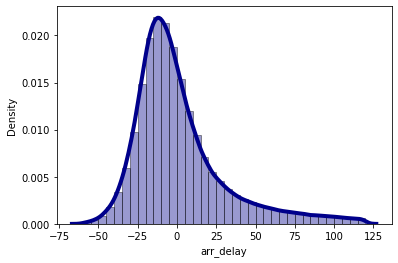

In [ ]:
# Density Plot and Histogram of all arrival delays
sns.distplot(flights['arr_delay'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

The curve shows the density plot which is essentially a smooth version of the histogram. The y-axis is in terms of density, and the histogram is normalized by default so that it has the same y-scale as the density plot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

Text(0, 0.5, 'Density')

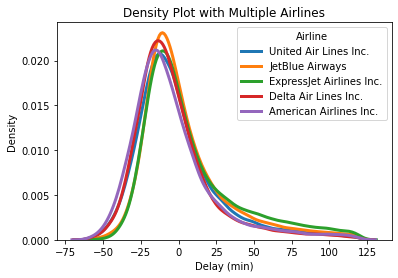

In [ ]:
# List of five airlines to plot
airlines = ['United Air Lines Inc.', 'JetBlue Airways', 'ExpressJet Airlines Inc.',
         'Delta Air Lines Inc.', 'American Airlines Inc.']

# Iterate through the five airlines
for airline in airlines:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

Filling in the density plot can help us to distinguish between overlapping distributions. Although this is not always a good approach, it can help to emphasize the difference between distributions. To shade the density plots, we pass in shade = True to the kde_kws argument in the distplot call.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

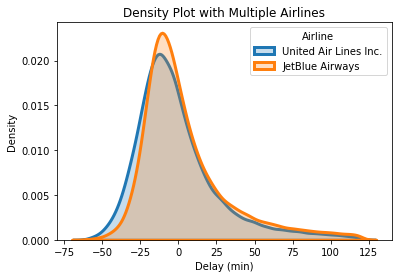

In [ ]:
# List of five airlines to plot
subsets = ['United Air Lines Inc.', 'JetBlue Airways']

# Iterate through the five airlines
for airline in subsets:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},
                 label = airline)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

